In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('air_quality_weather_fires.csv')

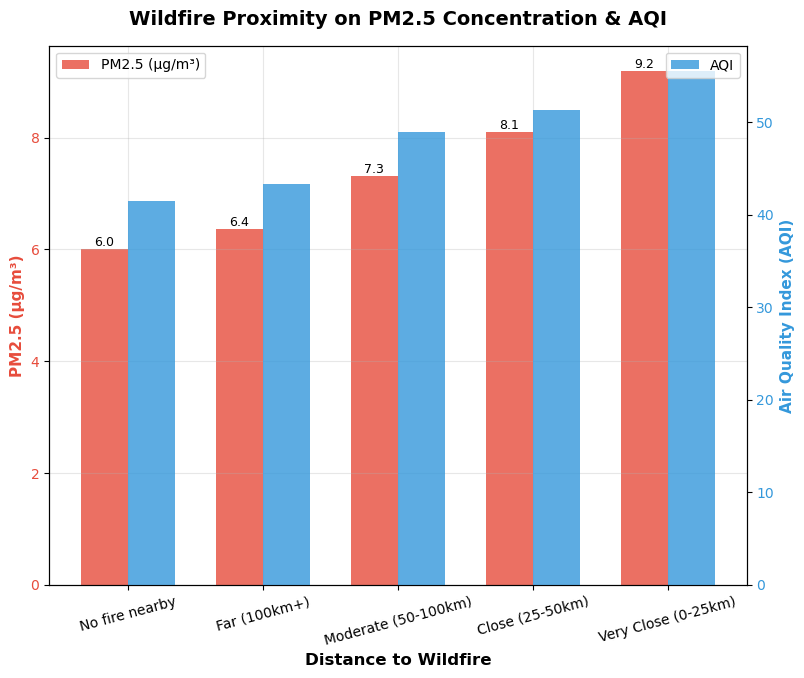

In [21]:
fig1, ax1 = plt.subplots(figsize=(9, 7))

# Re-map labels to fire distance categories
label_map = {'very_close': 'Very Close (0-25km)',
             'close': 'Close (25-50km)',
             'moderate': 'Moderate (50-100km)',
             'far': 'Far (100km+)',
             'no_fire': 'No fire nearby'}
df.replace({"fire_distance_category": label_map}, inplace=True)

fire_cat_order = ['No fire nearby', 'Far (100km+)', 'Moderate (50-100km)', 'Close (25-50km)', 'Very Close (0-25km)']
fire_data = df.groupby('fire_distance_category')[['PM25', 'AQI']].mean().reindex(fire_cat_order)

# Create grouped bar chart
x = np.arange(len(fire_cat_order))
width = 0.35

bars1 = ax1.bar(x - width/2, fire_data['PM25'], width, label='PM2.5 (μg/m³)', 
                color='#e74c3c', alpha=0.8)
ax1_twin = ax1.twinx()
bars2 = ax1_twin.bar(x + width/2, fire_data['AQI'], width, label='AQI', 
                     color='#3498db', alpha=0.8)

# Formatting
ax1.set_xlabel('Distance to Wildfire', fontweight='bold', fontsize=12)
ax1.set_ylabel('PM2.5 (μg/m³)', fontweight='bold', fontsize=11, color='#e74c3c')
ax1_twin.set_ylabel('Air Quality Index (AQI)', fontweight='bold', fontsize=11, color='#3498db')
ax1.set_title('Wildfire Proximity on PM2.5 Concentration & AQI', 
              fontweight='bold', fontsize=14, pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(fire_cat_order, rotation=15)
ax1.tick_params(axis='y', labelcolor='#e74c3c')
ax1_twin.tick_params(axis='y', labelcolor='#3498db')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)

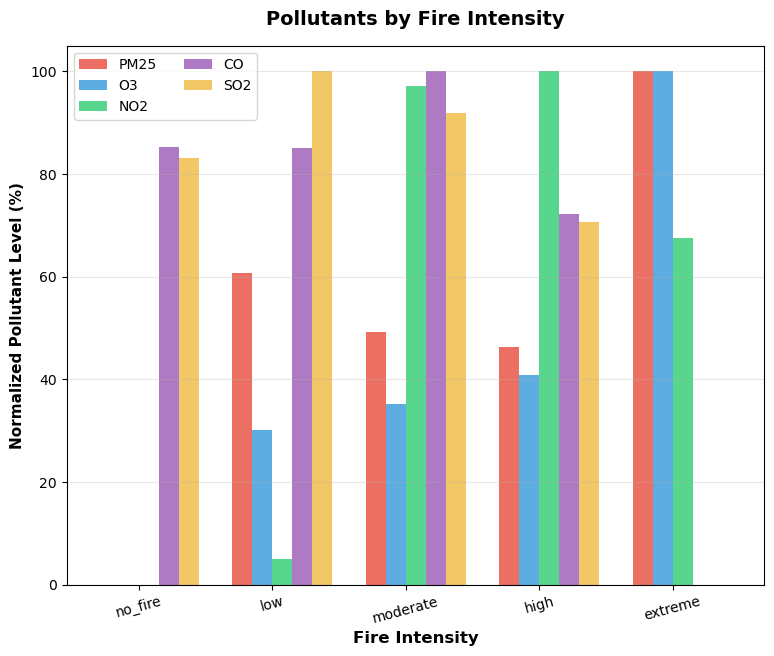

In [34]:
fig, ax = plt.subplots(figsize=(9, 7))

# Define fire intensity order and pollutants to analyze
intensity_order = ['no_fire', 'low', 'moderate', 'high', 'extreme']
pollutants = ['PM25', 'O3', 'NO2', 'CO', 'SO2']
colors = ['#e74c3c', '#3498db', '#2ecc71', '#9b59b6', "#efba3e" ]

# Create grouped bar chart with normalized values
x = np.arange(len(intensity_order))
width = 0.15

for i, pollutant in enumerate(pollutants):
    data = df.groupby('fire_intensity')[pollutant].mean().reindex(intensity_order)
    # Normalize to 0-100 scale for comparability
    normalized = (data - data.min()) / (data.max() - data.min()) * 100
    ax.bar(x + i*width, normalized, width, label=pollutant, color=colors[i], alpha=0.8)

# Formatting
ax.set_xlabel('Fire Intensity', fontweight='bold', fontsize=12)
ax.set_ylabel('Normalized Pollutant Level (%)', fontweight='bold', fontsize=11)
ax.set_title('Pollutants by Fire Intensity', 
              fontweight='bold', fontsize=14, pad=15)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(intensity_order, rotation=15)
ax.legend(loc='upper left', ncol=2)
ax.grid(True, alpha=0.3, axis='y')
